In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# cahart : 06-Backtesting/BlackLitermann-HRP/Cahart_No-BL/portfolio_stats.csv
path_cahart = 'Cahart/cumulative_return.csv'
path_signals = 'Signals/cumulative_return.csv'


df_cahart = pd.read_csv(path_cahart, index_col=0).rename(columns={'Portfolio': 'Cahart Signals'})
df_signals = pd.read_csv(path_signals, index_col=0).rename(columns={'Portfolio': 'Signals'})


# Extract the benchmark column from one of the dataframes
benchmark = df_cahart[['Benchmark']]

# Drop the benchmark column from the original dataframes
df_cahart = df_cahart.drop(columns=['Benchmark'])
df_signals = df_signals.drop(columns=['Benchmark'])

# Concatenate the dataframes along with the benchmark column
df = pd.concat([df_cahart, df_signals, benchmark], axis=1)

df

,Cahart Signals,Signals,Benchmark
t1,,,
2010-02-26,0.0553,0.0410,0.0285
2010-03-31,0.1437,0.1141,0.0889
2010-04-30,0.1806,0.1476,0.1048
2010-06-30,0.1110,0.0893,0.0452
2010-07-30,0.1743,0.1414,0.1170
...,...,...,...
2023-08-31,5.8689,8.1361,3.0842
2023-09-29,5.6444,7.6584,2.8677
2023-10-31,5.2648,7.3298,2.7645


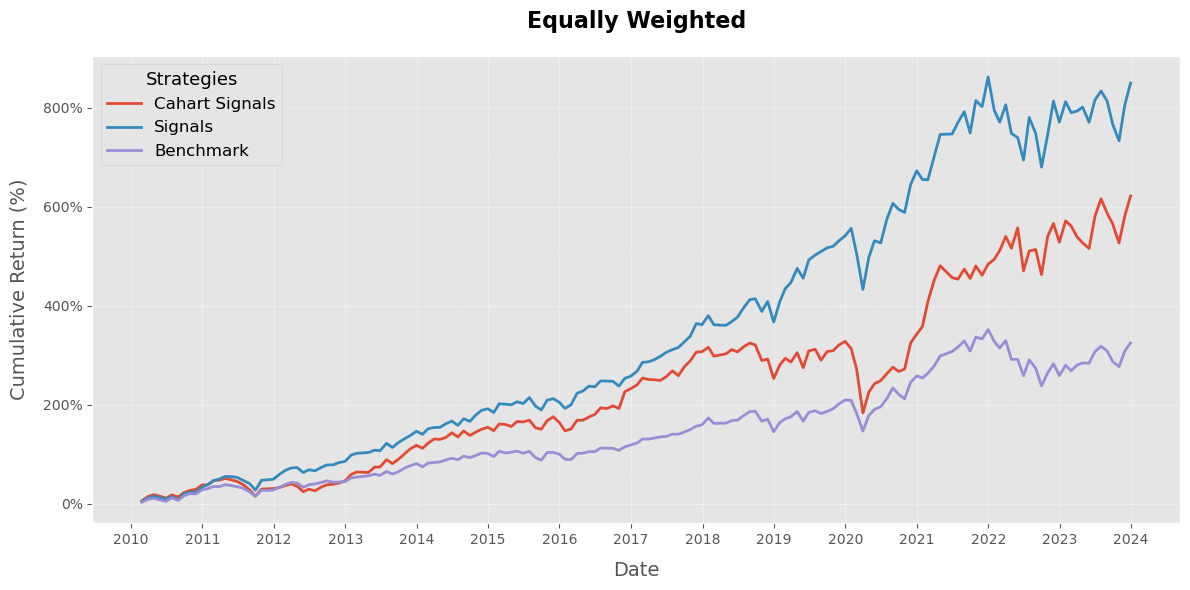

Plot saved to cumulative_return_plot.png


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.dates import YearLocator, DateFormatter

# Ensure the DataFrame index is a datetime index
df.index = pd.to_datetime(df.index)

def plot_cumulative_returns(df, strategy_name, save_path="cumulative_return_plot.png"):
    """
    Plots cumulative returns for multiple strategies and a benchmark in a professional style.
    
    Parameters:
        df (pd.DataFrame): Dataframe containing cumulative returns for strategies and a benchmark.
        strategy_name (str): Title for the plot.
        save_path (str): Path to save the plot as an image file.
    """
    # Use the ggplot style for a professional aesthetic
    plt.style.use("ggplot")

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot each strategy's cumulative return
    for col in df.columns:
        ax.plot(
            df.index, 
            df[col], 
            label=col, 
            linewidth=2
        )

    # Set the title and axis labels
    ax.set_title(strategy_name, fontsize=16, pad=20, weight="bold")
    ax.set_xlabel("Date", fontsize=14, labelpad=10)
    ax.set_ylabel("Cumulative Return (%)", fontsize=14, labelpad=10)

    # Format the x-axis to show only the years
    ax.xaxis.set_major_locator(YearLocator())  # Show ticks every year
    ax.xaxis.set_major_formatter(DateFormatter('%Y'))  # Format ticks as year only

    # Format the y-axis to display percentages
    ax.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

    # Add a legend with a larger font size
    ax.legend(title="Strategies", fontsize=12, title_fontsize=13, loc="upper left")

    # Add subtle gridlines
    ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

    # Adjust layout to prevent clipping
    plt.tight_layout()

    # Save the plot to a file
    plt.savefig(save_path, bbox_inches="tight", dpi=300)

    # Display the plot
    plt.show()

    print(f"Plot saved to {save_path}")

# Use the function to plot your data
plot_cumulative_returns(df, "Equally Weighted")
